In [1]:
import os
#display pictures
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf 
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import math 
import datetime
import time

In [2]:
#Vertical barchart images
vertical_bar_chart_dir = os.path.join("Images/Vertical_Bar_Chart")

#Compound vertical barchart images 
#compound_vertical_bar_chart_dir = os.path.join("Images/Compound_Vertical_Bar_chart")

Random_dir = os.path.join("Images/Random")

#Horizontal barchart images
#horizontal_bar_chart_dir = os.path.join("Images/Horizontal_Bar_Chart")

#Line chart images
line_chart_dir = os.path.join("Images/Line_chart")

#multi-line chart images
multi_line_chart_dir = os.path.join("Images/Multi_Line_Chart")

#Pi chart images
pie_chart_dir = os.path.join("Images/Pie_chart")

In [3]:
#print file names
vertical_bar_chart_names = os.listdir(vertical_bar_chart_dir)
print(vertical_bar_chart_names[:10])

#compound_vertical_bar_chart_names = os.listdir(compound_vertical_bar_chart_dir)
#print(compound_vertical_bar_chart_names[:10])

Random_chart_names = os.listdir(Random_dir)
print(Random_chart_names)
#horizontal_bar_chart_names = os.listdir(horizontal_bar_chart_dir)
#print(vertical_bar_chart_names[:10])

line_chart_names = os.listdir(line_chart_dir)
print(line_chart_names[:10])

multi_line_chart_names = os.listdir(multi_line_chart_dir)
print(multi_line_chart_names[:10])

pie_chart_names = os.listdir(pie_chart_dir)
print(pie_chart_names[:10])

['c66f5e3b376ec65f22be8d08a8665155_d3d3Lm1kLXBhZWRpZ3JlZS5ldQk2Mi4xNDkuMTQyLjEyNA==-0-4.png', 'c6a105a47f1bf1c71d99964a0ed26fdb_d3d3Lm94Zm9yZC5nb3YudWsJNTQuNzIuMTAwLjI1MA==.xls-0-0.png', 'c6a341eac255457d2728c402251173e6_aW1nLmNoYW5kb28ub3JnCTEzLjMyLjE3OS40MA==-0-0.png', 'c6b82b81186a4802b150b101ce0ec4b1_d3d3LnN0cm9rZWF1ZGl0LnNjb3QubmhzLnVrCTE5My4xOTUuNzguNzQ=.xls-11-0.png', 'c6bc0ca0ffc2bd6711820d1a1b636252_d3d3LmpvaG5maWVsZGluZ3NjaG9vbC5jby51awk3OC4xMzcuMTE2LjEwMw==.xls-0-0.png', 'c709f815f4bae5f14ff5e3f8a8cc019d_d3d3LmNvcnRlaWRoLm9yLmNyCTIwMS4xOTguMjQ2LjE5Mw==-0-0.png', 'c724bcdcfd02cf9f24d3ae8c1a483dff_d3d3LmxhbnNzdHlyZWxzZW4uc2UJMTkyLjE2NS4yMi4xMzU=.xls-1-0.png', 'c7357790d11d42440433c6828e0a8c70_d3d3Lmp1bnRhZGVhbmRhbHVjaWEuZXMJMjE3LjEyLjIwLjgx-0-1.png', 'c736f0150125e949f70390d52c9c1e40_d3d3LndoaXR0aW5ndG9uLm5ocy51awk1Ljc5LjI1Ljk5.xls-0-0.png', 'c7b5dfff906e8957d7514e53d793fcf7_d3d3Lm5obXJjLmdvdi5hdQkxNjEuMTQ2LjIyNy40OA==.xls-1-0.png']
['000000577718.jpg', '000000577719.jpg', '00

In [4]:
#total number of images
print("Total number of verical bar chart images: ", len(vertical_bar_chart_names))
print("Total number of Random images: ", len(Random_chart_names))
#print("Total number of horizontal bar chart images: ", len(horizontal_bar_chart_names))
print("Total number of line chart images: ", len(line_chart_names))
print("Total number of Multi line chart images: ", len(multi_line_chart_names))
print("Total number of Pie chart images: ", len(pie_chart_names))

Total number of verical bar chart images:  735
Total number of Random images:  1227
Total number of line chart images:  500
Total number of Multi line chart images:  500
Total number of Pie chart images:  625


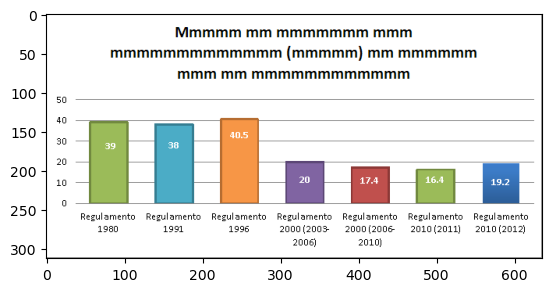

In [5]:
#vertical bar chart display
img = mpimg.imread(os.path.join(vertical_bar_chart_dir, vertical_bar_chart_names[5]))
plt.imshow(img)

In [6]:
#Horizontal bar chart display
#img = mpimg.imread(os.path.join(horizontal_bar_chart_dir, horizontal_bar_chart_names[5]))
#plt.imshow(img)

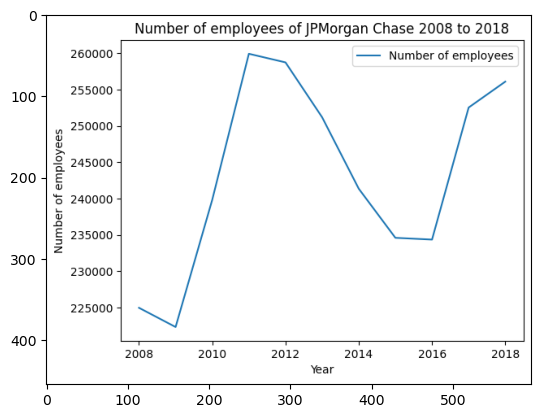

In [7]:
#line chart
img = mpimg.imread(os.path.join(line_chart_dir, line_chart_names[25]))
plt.imshow(img)

In [8]:
#model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #second conv
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #third conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #fourth conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #fifth conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [10]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=["accuracy"])

In [11]:
#image generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'Images',
    target_size = (300, 300),
    batch_size = 256,
    class_mode = 'categorical',
    subset = 'training'
)

val_generator  = train_datagen.flow_from_directory(
    'Images',
    target_size = (300, 300),
    batch_size = 256,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 2869 images belonging to 5 classes.
Found 717 images belonging to 5 classes.


In [12]:
#history-model fitting
history = model.fit(
    train_generator,
    validation_data = val_generator,
    steps_per_epoch = 12,
    epochs = 30,
    verbose =1
)

Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 2.0072 - accuracy: 0.3130

C:\Users\Lakshan\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 80s 7s/step - loss: 2.0072 - accuracy: 0.3130 - val_loss: 1.5896 - val_accuracy: 0.2413
Epoch 2/30
12/12 [==============================] - 82s 7s/step - loss: 1.4771 - accuracy: 0.3053 - val_loss: 1.2907 - val_accuracy: 0.5119
Epoch 3/30
12/12 [==============================] - 83s 7s/step - loss: 1.4809 - accuracy: 0.4287 - val_loss: 1.4276 - val_accuracy: 0.5021
Epoch 4/30
12/12 [==============================] - 79s 6s/step - loss: 1.2367 - accuracy: 0.4817 - val_loss: 0.9170 - val_accuracy: 0.5927
Epoch 5/30
12/12 [==============================] - 78s 6s/step - loss: 1.0453 - accuracy: 0.5769 - val_loss: 0.8068 - val_accuracy: 0.6960
Epoch 6/30
12/12 [==============================] - 77s 6s/step - loss: 1.2251 - accuracy: 0.4887 - val_loss: 0.7284 - val_accuracy: 0.6709
Epoch 7/30
12/12 [==============================] - 77s 6s/step - loss: 1.0975 - accuracy: 0.5755 - val_loss: 0.8176 - val_accuracy: 0.7741
Epoch 8/30
12/12 [=============

In [13]:
import numpy as np
from PIL import Image

# Load and preprocess the image
img = Image.open("test/1381.png")
img = img.resize((300, 300))
x = np.array(img)
x = x[:, :, :3] # Remove the 4th channel
x = x / 255. # Scale pixel values to [0, 1]
x = np.expand_dims(x, axis=0) # Add an extra dimension

# Pass the image through the model
preds = model.predict(x)

# Get the class with the highest predicted probability
class_idx = np.argmax(preds[0])

# Get the class labels from the generator
class_labels = train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}

# Display the predicted class
print(f"The image is predicted to be a {class_labels[class_idx]}")


1/1 [==============================] - 0s 362ms/step
The image is predicted to be a Vertical_Bar_Chart


In [14]:
model.save("Update.h5")